<a href="https://colab.research.google.com/github/dannyxplicit/ML_-Cough-Diagnosis/blob/main/dryerpredicitionV4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install statsmodels if not already installed (usually pre-installed in Colab)
!pip install statsmodels

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf # For running OLS regression with formulas

# Set plot style for better aesthetics
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Default figure size
plt.rcParams['figure.dpi'] = 100 # High resolution plots


In [ ]:
import pandas as pd

# Replace with the correct path to your file in Google Drive
file_path = '/content/Data accessibility.xlsx'
df_data = pd.read_excel(file_path, sheet_name='Data and Design')
print(df_data.head())

   Unnamed: 0 Unnamed: 1       Unnamed: 2 Unnamed: 3       Unnamed: 4  \
0         NaN        NaN              NaN        NaN              NaN   
1         NaN       Runs      Coded value        NaN     Actual value   
2         NaN        NaN  Drying time (h)      Temp.  Drying time (h)   
3         NaN          1                0          1               36   
4         NaN          2                1          0               48   

  Unnamed: 5 Unnamed: 6 Unnamed: 7  Unnamed: 8  Unnamed: 9 Unnamed: 10  \
0        NaN        NaN        NaN         NaN         NaN         NaN   
1        NaN  Responses        NaN         NaN         NaN         NaN   
2      Temp.   Moisture     Colour         NaN         NaN         NaN   
3         55       31.4       31.7         NaN         NaN         NaN   
4         50       29.7       32.5         NaN         NaN   Parameter   

   Unnamed: 11  Unnamed: 12  Unnamed: 13  Unnamed: 14 Unnamed: 15 Unnamed: 16  \
0          NaN          NaN        

In [ ]:
df_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   0 non-null      float64
 1   Unnamed: 1   10 non-null     object 
 2   Unnamed: 2   11 non-null     object 
 3   Unnamed: 3   10 non-null     object 
 4   Unnamed: 4   11 non-null     object 
 5   Unnamed: 5   10 non-null     object 
 6   Unnamed: 6   11 non-null     object 
 7   Unnamed: 7   10 non-null     object 
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
 10  Unnamed: 10  3 non-null      object 
 11  Unnamed: 11  3 non-null      float64
 12  Unnamed: 12  3 non-null      float64
 13  Unnamed: 13  3 non-null      float64
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  3 non-null      object 
 16  Unnamed: 16  3 non-null      object 
 17  Unnamed: 17  3 non-null      object 
 18  Unnamed: 18  3 non-null      object 
dtypes: float64

In [ ]:
print("\n--- RSM Analysis for Moisture Content ---")

# Define the model formula based on the given equation:
# Moisture content = 35.30000 - 14.26667A - 2.80000A^2 - 6.00000B - 0.60000B^2
# In statsmodels, 'I()' is used for non-linear terms like A^2
moisture_model = smf.ols('Moisture ~ Coded_Drying_Time + I(Coded_Drying_Time**2) + Coded_Temp + I(Coded_Temp**2)', data=df_clean).fit()

# Print the model summary which includes coefficients, R-squared, and p-values
print(moisture_model.summary())

# You can extract specific values if needed
print(f"\nMoisture Model R-squared: {moisture_model.rsquared:.4f}")
print(f"Moisture Model Adjusted R-squared: {moisture_model.rsquared_adj:.4f}")


--- RSM Analysis for Moisture Content ---
                            OLS Regression Results                            
Dep. Variable:               Moisture   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     148.3
Date:                Tue, 03 Feb 2026   Prob (F-statistic):           0.000890
Time:                        08:17:35   Log-Likelihood:                -5.4800
No. Observations:                   8   AIC:                             20.96
Df Residuals:                       3   BIC:                             21.36
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [ ]:
import pandas as pd

# Create df_clean by selecting relevant rows and columns from df_data
# Based on df_data.head() and .info(), the actual data starts from index 3 (row 4 in Excel)
# and includes 8 experimental runs up to index 10.
df_clean = df_data.iloc[3:11].copy()

# Rename the columns for clarity based on the header information in the Excel file
df_clean = df_clean.rename(columns={
    'Unnamed: 1': 'Run',
    'Unnamed: 2': 'Coded_Drying_Time', # Coded value for Drying time (h)
    'Unnamed: 3': 'Coded_Temp',        # Coded value for Temp.
    'Unnamed: 6': 'Moisture',          # Response: Moisture
    'Unnamed: 7': 'Colour'             # Response: Colour
})

# Select only the columns needed for the model and convert them to numeric.
# Using errors='coerce' will turn any non-convertible values into NaN, which can then be dropped.
df_clean = df_clean[['Run', 'Coded_Drying_Time', 'Coded_Temp', 'Moisture', 'Colour']].apply(pd.to_numeric, errors='coerce')

# Drop any rows that might have resulted in NaNs after numeric conversion (e.g., if there were non-numeric data entries)
df_clean.dropna(inplace=True)

print("Cleaned DataFrame (df_clean) head:")
display(df_clean.head())
print("\nCleaned DataFrame (df_clean) info:")
df_clean.info()


Cleaned DataFrame (df_clean) head:


,Run,Coded_Drying_Time,Coded_Temp,Moisture,Colour
3,1,0,1,31.4,31.7
4,2,1,0,29.7,32.5
5,3,-1,-1,45.7,16.7
6,4,-1,0,44.7,19.8
7,5,1,1,26.4,36.1



Cleaned DataFrame (df_clean) info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 3 to 10
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Run                8 non-null      int64  
 1   Coded_Drying_Time  8 non-null      int64  
 2   Coded_Temp         8 non-null      int64  
 3   Moisture           8 non-null      float64
 4   Colour             8 non-null      float64
dtypes: float64(2), int64(3)
memory usage: 452.0 bytes



--- Generating Visualizations ---


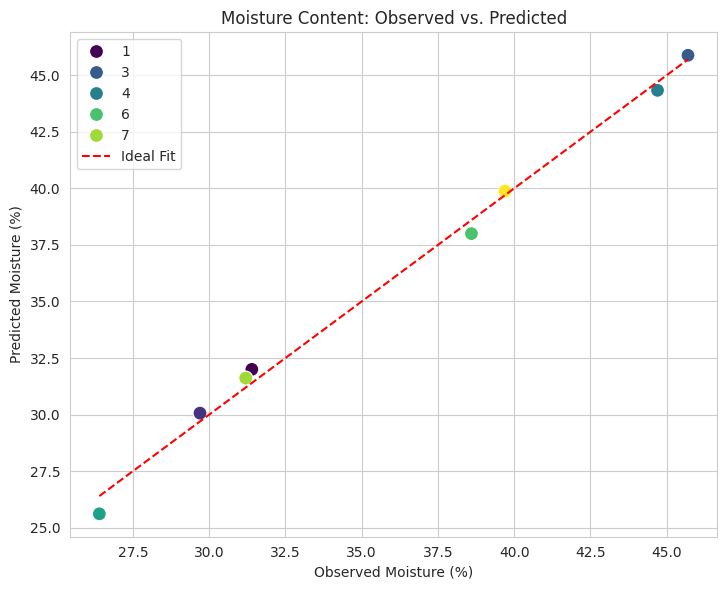

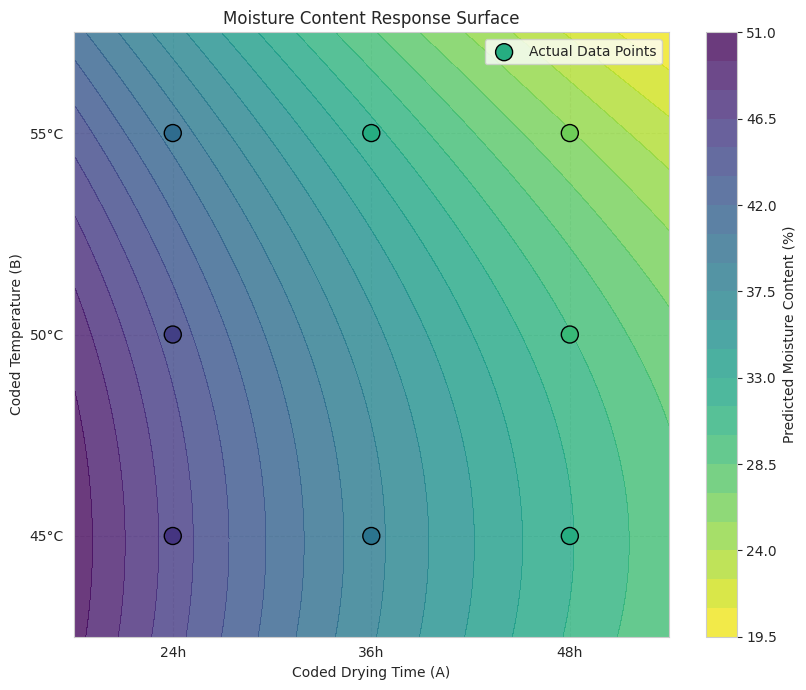

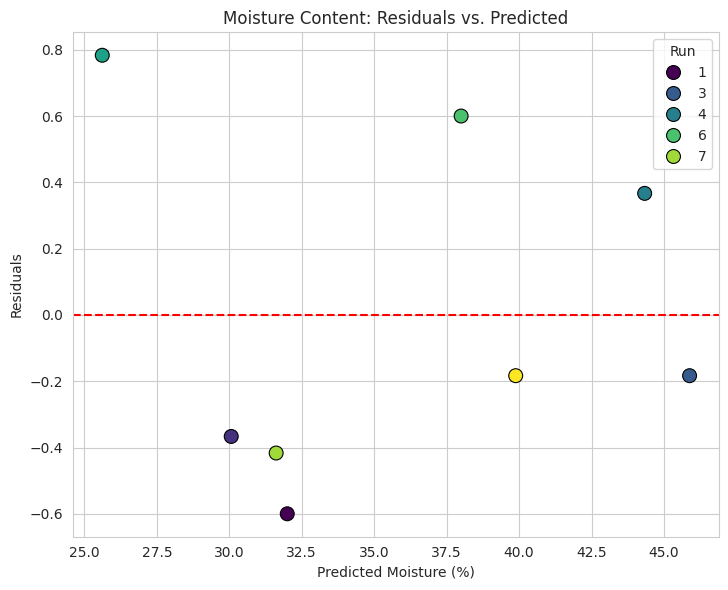

In [ ]:
print("\n--- Generating Visualizations ---")

# Calculate predicted values for both models
df_clean['Moisture_Predicted'] = moisture_model.predict(df_clean)
# df_clean['ColorChange_Predicted'] = color_model.predict(df_clean) # color_model is not defined

plt.figure(figsize=(14, 6))

# Plot for Moisture Content
plt.subplot(1, 2, 1)
sns.scatterplot(x='Moisture', y='Moisture_Predicted', data=df_clean, s=100, hue='Run', palette='viridis')
plt.plot([df_clean['Moisture'].min(), df_clean['Moisture'].max()], [df_clean['Moisture'].min(), df_clean['Moisture'].max()],
         color='red', linestyle='--', label='Ideal Fit')
plt.title('Moisture Content: Observed vs. Predicted')
plt.xlabel('Observed Moisture (%)')
plt.ylabel('Predicted Moisture (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Plot for Color Change (currently commented out as color_model is undefined)
# plt.subplot(1, 2, 2)
# sns.scatterplot(x='ColorChange', y='ColorChange_Predicted', data=df_clean, s=100, hue='Run', palette='viridis')
# plt.plot([df_clean['ColorChange'].min(), df_clean['ColorChange'].max()], [df_clean['ColorChange'].min(), df_clean['ColorChange'].max()],
#          color='red', linestyle='--', label='Ideal Fit')
# plt.title('Color Change: Observed vs. Predicted')
# plt.xlabel('Observed Color Change')
# plt.ylabel('Predicted Color Change')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()

plt.show()

# --- Generating Contour Plots (Response Surfaces) ---

# Create a meshgrid for the coded values of Time (A) and Temp (B)
# Range from -1.5 to 1.5 to cover and slightly extend beyond the experimental range [-1, 1]
a_range = np.linspace(-1.5, 1.5, 50)
b_range = np.linspace(-1.5, 1.5, 50)
A, B = np.meshgrid(a_range, b_range)

# Create a DataFrame for predictions
predict_df = pd.DataFrame({'Coded_Drying_Time': A.ravel(), 'Coded_Temp': B.ravel()}) # Using correct column names

# Predict Moisture and ColorChange for the meshgrid
Z_moisture = moisture_model.predict(predict_df).values.reshape(A.shape)
# Z_color = color_model.predict(predict_df).values.reshape(A.shape) # color_model is not defined

plt.figure(figsize=(16, 7))

# Contour Plot for Moisture Content
plt.subplot(1, 2, 1)
contour_moisture = plt.contourf(A, B, Z_moisture, levels=20, cmap='viridis_r', alpha=0.8) # viridis_r for decreasing values
plt.colorbar(contour_moisture, label='Predicted Moisture Content (%)')
plt.scatter(df_clean['Coded_Drying_Time'], df_clean['Coded_Temp'], c=df_clean['Moisture'], cmap='viridis_r',
            edgecolor='k', s=150, label='Actual Data Points', vmin=Z_moisture.min(), vmax=Z_moisture.max()) # Overlay actual data points
plt.title('Moisture Content Response Surface')
plt.xlabel('Coded Drying Time (A)')
plt.ylabel('Coded Temperature (B)')
plt.xticks([-1, 0, 1], ['24h', '36h', '48h'])
plt.yticks([-1, 0, 1], ['45°C', '50°C', '55°C'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Contour Plot for Color Change (currently commented out as color_model is undefined)
# plt.subplot(1, 2, 2)
# contour_color = plt.contourf(A, B, Z_color, levels=20, cmap='plasma', alpha=0.8)
# plt.colorbar(contour_color, label='Predicted Color Change')
# plt.scatter(df_clean['Coded_Drying_Time'], df_clean['Coded_Temp'], c=df_clean['ColorChange'], cmap='plasma',
#             edgecolor='k', s=150, label='Actual Data Points', vmin=Z_color.min(), vmax=Z_color.max()) # Overlay actual data points
# plt.title('Color Change Response Surface')
# plt.xlabel('Coded Drying Time (A)')
# plt.ylabel('Coded Temperature (B)')
# plt.xticks([-1, 0, 1], ['24h', '36h', '48h'])
# plt.yticks([-1, 0, 1], ['45°C', '50°C', '55°C'])
# plt.grid(True, linestyle='--', alpha=0.6)
# plt.legend()
# plt.tight_layout()

plt.show()

# --- Residual Plots (Optional) ---

plt.figure(figsize=(14, 6))

# Residual Plot for Moisture
plt.subplot(1, 2, 1)
sns.scatterplot(x=df_clean['Moisture_Predicted'], y=moisture_model.resid, hue=df_clean['Run'], palette='viridis', s=100, edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Moisture Content: Residuals vs. Predicted')
plt.xlabel('Predicted Moisture (%)')
plt.ylabel('Residuals')
plt.grid(True)
plt.tight_layout()

# Residual Plot for Color Change (currently commented out as color_model is undefined)
# plt.subplot(1, 2, 2)
# sns.scatterplot(x=df_clean['ColorChange_Predicted'], y=color_model.resid, hue=df_clean['Run'], palette='viridis', s=100, edgecolor='k')
# plt.axhline(y=0, color='red', linestyle='--')
# plt.title('Color Change: Residuals vs. Predicted')
# plt.xlabel('Predicted Color Change')
# plt.ylabel('Residuals')
# plt.grid(True)
# plt.tight_layout()

plt.show()

In [ ]:
print(f"Moisture Model R-squared: {moisture_model.rsquared:.4f}")
print(f"Moisture Model Mean Squared Error (MSE): {moisture_model.mse_resid:.4f}")


Moisture Model R-squared: 0.9950
Moisture Model Mean Squared Error (MSE): 0.6144


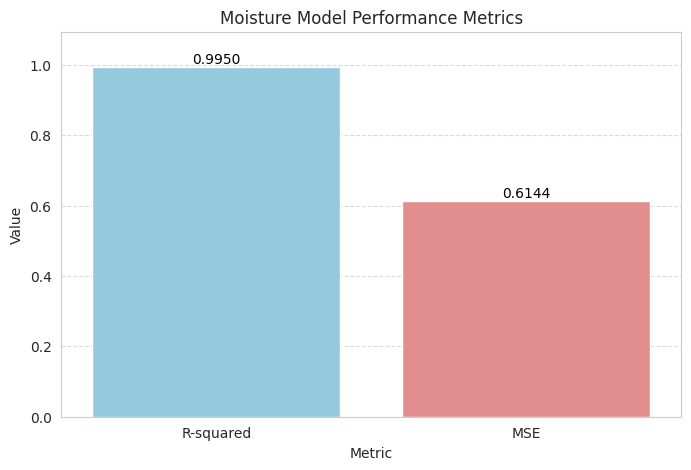

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Get the metrics from the moisture_model
r_squared = moisture_model.rsquared
mse = moisture_model.mse_resid

# Create a DataFrame for plotting
metrics_data = {
    'Metric': ['R-squared', 'MSE'],
    'Value': [r_squared, mse]
}
metrics_df = pd.DataFrame(metrics_data)

plt.figure(figsize=(8, 5))
sns.barplot(x='Metric', y='Value', hue='Metric', data=metrics_df, palette=['skyblue', 'lightcoral'], legend=False)
plt.title('Moisture Model Performance Metrics')
plt.ylabel('Value')
plt.ylim(0, max(r_squared, mse) * 1.1) # Set y-limit slightly above max value

# Add the numerical values on top of the bars
for index, row in metrics_df.iterrows():
    plt.text(index, row['Value'], f"{row['Value']:.4f}", color='black', ha="center", va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Implement and Compare Regression Algorithms


We will prepare the data for scikit-learn models, split it into training and testing sets, then implement and evaluate Ridge Regression, Support Vector Regression (SVR), and Random Forest Regressor. The performance metrics (R-squared and MSE) of these models will be calculated and compared with the existing OLS model, including a bar chart visualization.


The initial step in implementing machine learning models is to prepare the data. This involves defining the feature matrix (X) and the target vector (y) from the `df_clean` DataFrame, and then splitting them into training and testing sets to evaluate model performance on unseen data.



In [ ]:
from sklearn.model_selection import train_test_split

# 1. Define feature matrix X and target vector y
X = df_clean[['Coded_Drying_Time', 'Coded_Temp']]
y = df_clean['Moisture']

# 2. Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preparation complete.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data preparation complete.
X_train shape: (6, 2)
X_test shape: (2, 2)
y_train shape: (6,)
y_test shape: (2,)


The next step is to implement Ridge Regression, which involves importing the model, training it on the `X_train` and `y_train` datasets, making predictions on `X_test`, and then evaluating its performance using R-squared and Mean Squared Error (MSE).



In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

# 3. Implement Ridge Regression
# a. Instantiate a Ridge regressor
ridge_model = Ridge(alpha=1.0, random_state=42)

# c. Fit the Ridge model to X_train and y_train
ridge_model.fit(X_train, y_train)

# d. Make predictions on X_test
y_pred_ridge = ridge_model.predict(X_test)

# e. Calculate and store the R-squared and Mean Squared Error (MSE) for the Ridge model
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print("Ridge Regression Implementation Complete.")
print(f"Ridge R-squared: {r2_ridge:.4f}")
print(f"Ridge MSE: {mse_ridge:.4f}")

Ridge Regression Implementation Complete.
Ridge R-squared: 0.9992
Ridge MSE: 0.0157


The next step is to implement Support Vector Regression (SVR), which requires scaling the data, training the model, making predictions, and evaluating its performance using R-squared and Mean Squared Error (MSE).



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

# 4. Implement Support Vector Regression (SVR)
# a. Instantiate StandardScaler and fit it to X_train. Then transform both X_train and X_test.
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Instantiate and fit a scaler for y as well, as SVR can be sensitive to the scale of the target variable
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# c. Instantiate an SVR regressor (e.g., kernel='rbf')
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1) # Default parameters, can be tuned

# d. Fit the SVR model to the scaled X_train and y_train
svr_model.fit(X_train_scaled, y_train_scaled)

# e. Make predictions on the scaled X_test
y_pred_svr_scaled = svr_model.predict(X_test_scaled)

# Inverse transform the predictions to the original scale for evaluation
y_pred_svr = scaler_y.inverse_transform(y_pred_svr_scaled.reshape(-1, 1)).flatten()

# f. Calculate and store the R-squared and MSE for the SVR model
r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)

print("Support Vector Regression Implementation Complete.")
print(f"SVR R-squared: {r2_svr:.4f}")
print(f"SVR MSE: {mse_svr:.4f}")

Support Vector Regression Implementation Complete.
SVR R-squared: 0.9975
SVR MSE: 0.0493


The next step is to implement the Random Forest Regressor, which involves importing the model, training it on the `X_train` and `y_train` datasets, making predictions on `X_test`, and then evaluating its performance using R-squared and Mean Squared Error (MSE).



In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 5. Implement Random Forest Regressor
# a. Instantiate a RandomForestRegressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42) # Default parameters, can be tuned

# c. Fit the RandomForestRegressor model to X_train and y_train
random_forest_model.fit(X_train, y_train)

# d. Make predictions on X_test
y_pred_rf = random_forest_model.predict(X_test)

# e. Calculate and store the R-squared and MSE for the Random Forest model
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("Random Forest Regressor Implementation Complete.")
print(f"Random Forest R-squared: {r2_rf:.4f}")
print(f"Random Forest MSE: {mse_rf:.4f}")

Random Forest Regressor Implementation Complete.
Random Forest R-squared: 0.7649
Random Forest MSE: 4.6553


The next step is to consolidate the performance metrics (R-squared and MSE) from the OLS model and the newly implemented Ridge, SVR, and Random Forest models into a single pandas DataFrame for easy comparison and visualization.



Model Performance Metrics Comparison:


,Model,R-squared,MSE
0,OLS,0.994967,0.614444
1,Ridge,0.999209,0.015660
2,SVR,0.997512,0.049260
3,Random Forest,0.764913,4.655305


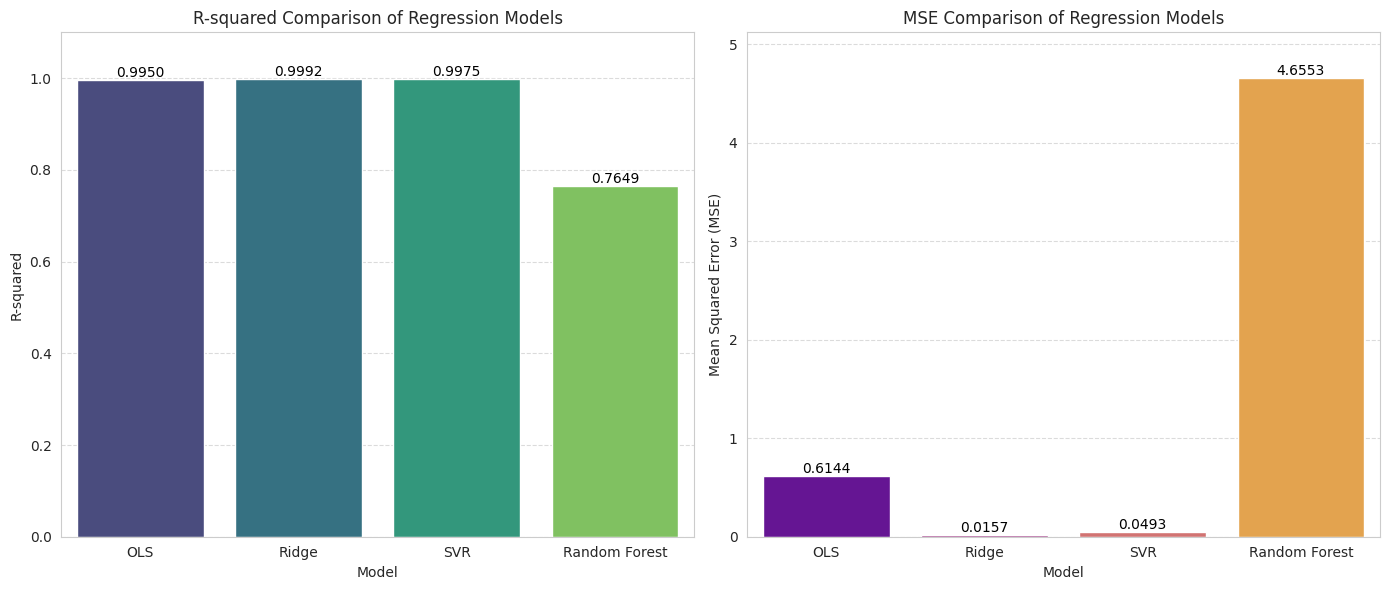

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get OLS metrics from the previously fitted moisture_model
# moisture_model.rsquared is R-squared
# moisture_model.mse_resid is Mean Squared Error (MSE)
r2_ols = moisture_model.rsquared
mse_ols = moisture_model.mse_resid

# 6. Create a pandas DataFrame to store the R-squared and MSE values for all models
metrics_data = {
    'Model': ['OLS', 'Ridge', 'SVR', 'Random Forest'],
    'R-squared': [r2_ols, r2_ridge, r2_svr, r2_rf],
    'MSE': [mse_ols, mse_ridge, mse_svr, mse_rf]
}
metrics_df_comparison = pd.DataFrame(metrics_data)

print("Model Performance Metrics Comparison:")
display(metrics_df_comparison)

# 7. Generate two bar charts side-by-side
plt.figure(figsize=(14, 6))

# Bar chart for R-squared values
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.barplot(x='Model', y='R-squared', hue='Model', data=metrics_df_comparison, palette='viridis', legend=False)
plt.title('R-squared Comparison of Regression Models')
plt.ylabel('R-squared')
plt.ylim(0, 1.1) # R-squared typically ranges from 0 to 1
for index, row in metrics_df_comparison.iterrows():
    plt.text(index, row['R-squared'], f"{row['R-squared']:.4f}", color='black', ha="center", va='bottom')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Bar chart for MSE values
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.barplot(x='Model', y='MSE', hue='Model', data=metrics_df_comparison, palette='plasma', legend=False)
plt.title('MSE Comparison of Regression Models')
plt.ylabel('Mean Squared Error (MSE)')
# Dynamically set y-limit for MSE based on max value for better visualization
plt.ylim(0, metrics_df_comparison['MSE'].max() * 1.1)
for index, row in metrics_df_comparison.iterrows():
    plt.text(index, row['MSE'], f"{row['MSE']:.4f}", color='black', ha="center", va='bottom')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
# 1. Define categories for Moisture
def categorize_moisture(moisture):
    if moisture < 30:
        return 'Low'
    elif 30 <= moisture < 40:
        return 'Medium'
    else:
        return 'High'

df_clean['Moisture_Category'] = df_clean['Moisture'].apply(categorize_moisture)

print("Moisture Categories created:")
display(df_clean[['Moisture', 'Moisture_Category']].head())
print("\nValue counts for Moisture Categories:")
display(df_clean['Moisture_Category'].value_counts())


Moisture Categories created:


,Moisture,Moisture_Category
3,31.4,Medium
4,29.7,Low
5,45.7,High
6,44.7,High
7,26.4,Low



Value counts for Moisture Categories:


,count
Moisture_Category,
Medium,4
Low,2
High,2



Confusion Matrix for Moisture Categories:


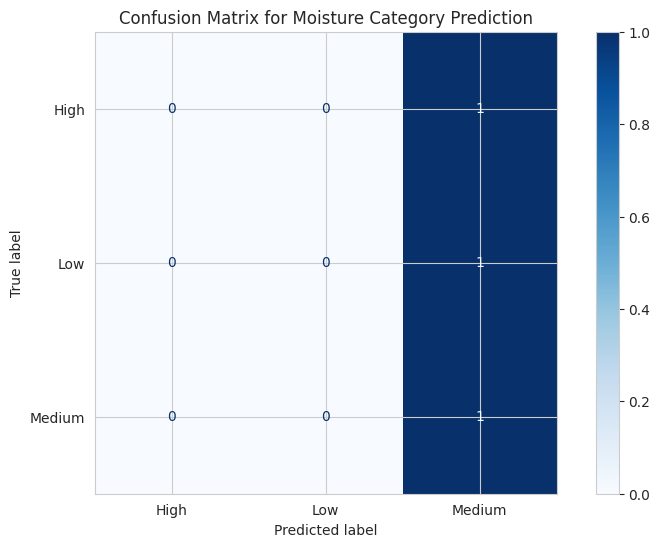

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 2. Prepare data for classification
X_clf = df_clean[['Coded_Drying_Time', 'Coded_Temp']]
y_clf = df_clean['Moisture_Category']

# Split data into training and testing sets for classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42, stratify=y_clf)

# 3. Train a classification model (Decision Tree Classifier)
clf_model = DecisionTreeClassifier(random_state=42)
clf_model.fit(X_train_clf, y_train_clf)

# Make predictions on the test set
y_pred_clf = clf_model.predict(X_test_clf)

# 4. Generate and display the Confusion Matrix
print("\nConfusion Matrix for Moisture Categories:")
cm = confusion_matrix(y_test_clf, y_pred_clf, labels=clf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Moisture Category Prediction')
plt.show()
